In [2]:
import sys
import os

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/2025_data"))
sys.path.append('/eos/home-d/dcostasr/SWAN_projects/software/hipy')

from wcte.brbtools import sort_run_files, get_part_files, select_good_parts
from wcte.brbtools import full_df_mPMT, df_mpmt_sumCharge
from wcte.mapping  import id_names

import numpy             as np
import hipy.pltext       as pltext
import matplotlib.pyplot as plt
import pandas            as pd
import hipy.utils        as ut
import hipy.cfit         as cfit
import hipy.efit         as efit
import hipy.histos       as histos

from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

pltext.style()

In [ ]:
run = 1570

In [4]:
df_conc = pd.read_parquet(f"/eos/home-d/dcostasr/SWAN_projects/2025_data/data/{run}/df_concat.parquet")
df_mpmt = pd.read_parquet(f"/eos/home-d/dcostasr/SWAN_projects/2025_data/data/{run}/df_mPMTs.parquet")

In [5]:
df_conc

,evt,card,channel,charge,time
0,0,25,6,160.0,1992.774048
1,0,25,10,112.0,1993.678101
2,0,103,6,88.0,1367.580811
3,0,111,5,77.0,1742.446655
4,0,36,7,306.0,1713.531372
...,...,...,...,...,...
178809296,304687,131,13,3575.0,2208.217041
178809297,304687,131,14,2191.0,2207.650391
178809298,304687,131,15,2824.0,2206.555176
178809299,304687,131,0,1757.0,2406.633667


In [6]:
df_mpmt

,evt,card1_charge,card1_time,card3_charge,card3_time,card6_charge,card6_time,card7_charge,card7_time,card8_charge,...,card114_charge,card114_time,card115_charge,card115_time,card117_charge,card117_time,card118_charge,card118_time,card_total_charge,card_total_mean_time
evt,,,,,,,,,,,,,,,,,,,,,
0,0,1464.0,858.184521,2161.0,1818.529395,1514.0,1117.421570,358.0,1440.498169,1841.0,...,784.0,967.941455,NaN,NaN,649.0,1710.222046,1904.0,1117.701385,98042.0,1408.761509
1,1,6819.0,1761.646671,6643.0,1961.598728,15018.0,1546.041562,3291.0,1661.197197,9320.0,...,3713.0,1162.675039,17797.0,2412.788720,25951.0,1788.452576,31394.0,2965.659424,896081.0,1848.913290
2,2,2770.0,854.065796,2864.0,1815.122382,2469.0,1113.392478,73.0,1440.340332,1348.0,...,1028.0,948.012870,NaN,NaN,175.0,1711.701660,5471.0,1415.764347,101960.0,1393.686985
3,3,1886.0,854.539272,2556.0,1815.224554,3015.0,1345.950731,NaN,NaN,1738.0,...,128.0,956.364136,358.0,1224.994507,261.0,1714.096191,5097.0,1331.451619,70894.0,1450.108967
4,4,6029.0,1122.139130,10835.0,1690.767171,14759.0,1268.144226,5642.0,1248.749533,4151.0,...,8580.0,965.852625,1682.0,909.189209,1478.0,1397.639282,19354.0,1476.403417,631961.0,1391.215548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304683,304683,1970.0,1196.080225,5255.0,1813.909640,6105.0,1195.694435,3046.0,3004.904719,2110.0,...,5208.0,2388.035614,129.0,1214.576294,13214.0,2798.993661,4501.0,1111.695301,153615.0,1940.876482
304684,304684,20848.0,2696.416374,27095.0,3623.229355,49047.0,2932.095020,7451.0,3813.135335,16137.0,...,9560.0,3029.295723,5444.0,3320.508076,3615.0,3786.523506,59766.0,2707.329207,1298790.0,3393.430600
304685,304685,5016.0,628.764361,22004.0,1880.198930,5926.0,867.677727,17252.0,1616.406555,4453.0,...,18702.0,1106.008751,6981.0,1162.328637,7613.0,1479.850438,8886.0,894.786583,1146777.0,1641.551419


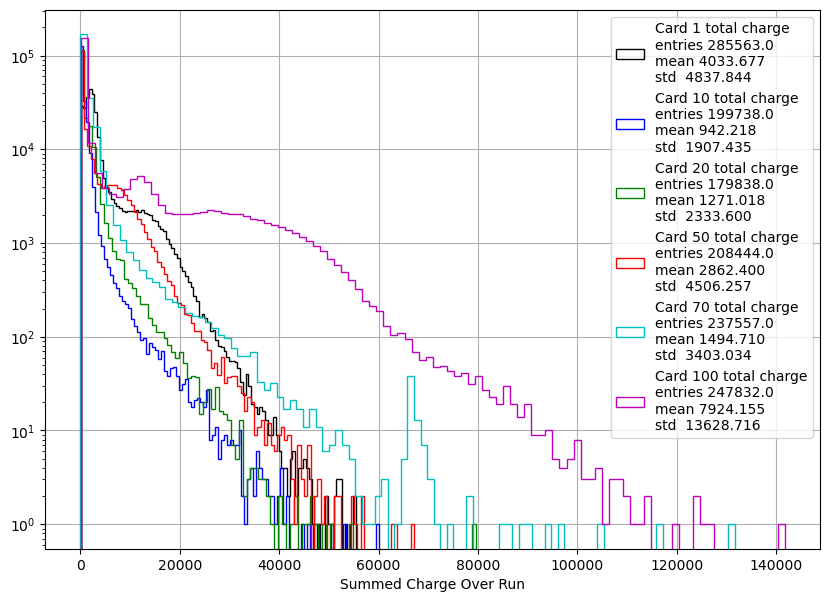

In [8]:
fig = plt.figure(figsize=(10, 7))

pltext.hist(df_mpmt["card1_charge"].dropna(), 100, ylog=True,  xylabels=("Summed Charge Over Run"), label="Card 1 total charge");
pltext.hist(df_mpmt["card10_charge"].dropna(), 100, ylog=True , label="Card 10 total charge");
pltext.hist(df_mpmt["card20_charge"].dropna(), 100, ylog=True , label="Card 20 total charge");
pltext.hist(df_mpmt["card40_charge"].dropna(), 100, ylog=True , label="Card 50 total charge");
pltext.hist(df_mpmt["card80_charge"].dropna(), 100, ylog=True , label="Card 70 total charge");
pltext.hist(df_mpmt["card100_charge"].dropna(), 100, ylog=True, label="Card 100 total charge");

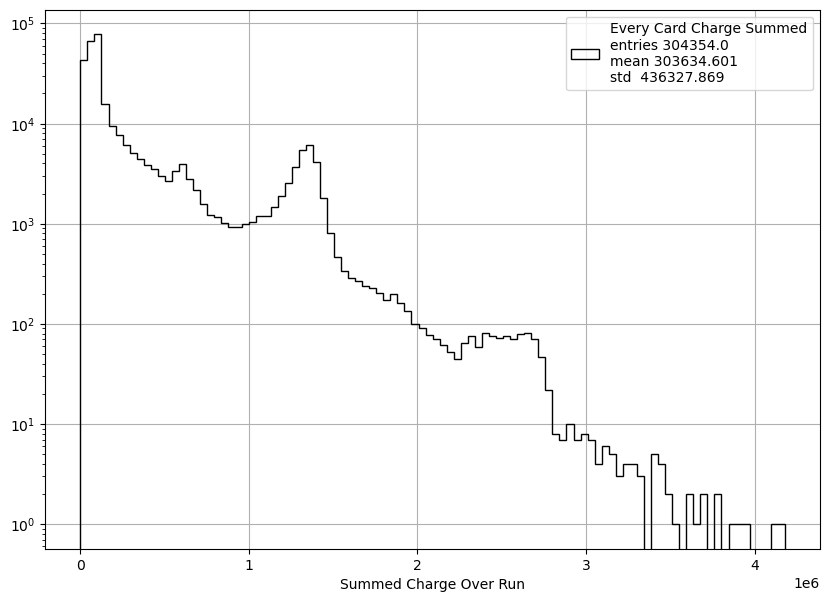

In [9]:
fig = plt.figure(figsize=(10, 7))
pltext.hist(df_mpmt["card_total_charge"].dropna(), 100, ylog=True,  xylabels=("Summed Charge Over Run"), label="Every Card Charge Summed");

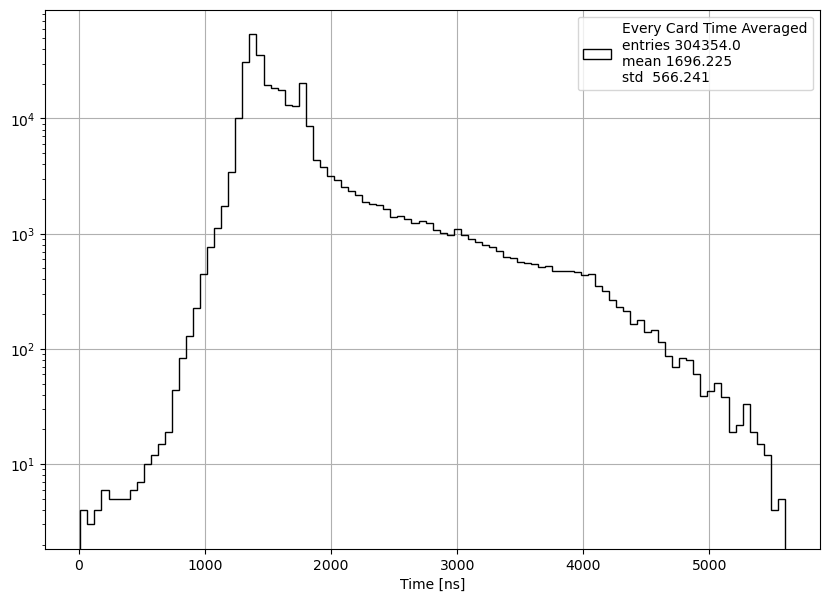

In [12]:
fig = plt.figure(figsize=(10, 7))
pltext.hist(df_mpmt["card_total_mean_time"].dropna(), 100, ylog=True,  xylabels=("Time [ns]"), label="Every Card Time Averaged");